In [ ]:
import pandas as pd
import re
import nltk
import numpy as np
from numpy.fft import fft,rfft, ifft, fftfreq, rfftfreq
import matplotlib.pyplot as plt

import string

import re
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from scipy.interpolate import CubicSpline
from xgboost import XGBClassifier
from sklearn.svm import SVC


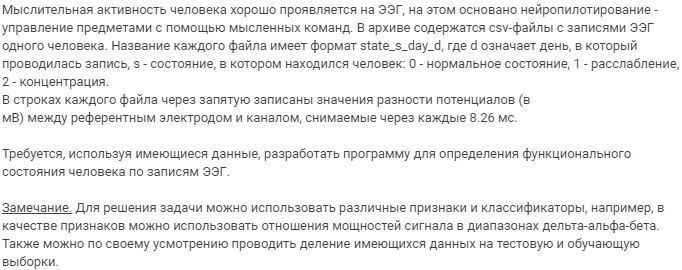

In [ ]:
def avg_amplitude(k1,k2,multiplier,spectrum):
  avg = 0
  k1_mult = k1 #* multiplier
  k2_mult = k2 #* multiplier
  for i in range(k1_mult, k2_mult):
    avg += spectrum[i] / (k2_mult - k1_mult + 1)

  return avg

In [ ]:
def extract_powers():
  df_result = pd.DataFrame(columns=['gamma_power', 'beta_power', 'alpha_power', 'theta_power', 'delta_power', 'state'])

  T = 8.26 # мс
  fd = 1 // (T / 1000)

  for i in range(3):
    for j in range(3,5):
      df = pd.read_csv("state_"+str(i)+"_day_"+str(j)+".csv", sep=',')

      for ind, row in df.iterrows():
        temp_df = row.dropna()
        #temp_df = temp_df * 1000 # из мВ в мкВ

        inter_data = CubicSpline(range(0,len(temp_df)), temp_df)
        inter = [(float(inter_data(i)*1000000)) for i in range(len(temp_df))]  #интерполируем значения

        N = len(inter)
        multiplier = int(N // fd)
        #freqs = fftfreq(N, 1/fd)
        freqs = rfftfreq(N, 1/fd)

        EEG_ftt = rfft(np.array(inter),n=N)

        power_spectrum = 2*(np.abs(EEG_ftt) / N)**2

        d = np.argwhere(freqs >= 0.5)[0][0]
        a = np.argwhere(freqs >= 8)[0][0]
        t = np.argwhere(freqs >= 4)[0][0]
        b = np.argwhere(freqs >= 12)[0][0]
        g = np.argwhere(freqs >= 30)[0][0]
        end = np.argwhere(freqs >= 45)[0][0]

        delta = np.sum(power_spectrum[d:t])
        theta = np.sum(power_spectrum[t:a])
        alpha = np.sum(power_spectrum[a:b])
        beta = np.sum(power_spectrum[b:g])
        gamma = np.sum(power_spectrum[g:end])
        power = sum([delta, theta, alpha, beta, gamma])

        df_result.loc[len(df_result.index )] = [gamma/power, beta/power, alpha/power, theta/power, delta/power, i]

  return df_result


In [ ]:
df_power = extract_powers()
df_power

,gamma_power,beta_power,alpha_power,theta_power,delta_power,state
0,0.001898,0.009384,0.006836,0.042109,0.939773,0.0
1,0.011219,0.064185,0.027905,0.088526,0.808165,0.0
2,0.008133,0.067481,0.043404,0.102799,0.778183,0.0
3,0.009488,0.063466,0.023112,0.080711,0.823223,0.0
4,0.013367,0.093246,0.036835,0.127682,0.728869,0.0
5,0.022413,0.076607,0.034572,0.101848,0.764561,0.0
6,0.015077,0.069195,0.046197,0.113465,0.756065,0.0
7,0.005407,0.021430,0.029201,0.152549,0.791414,0.0
8,0.008073,0.047729,0.033516,0.117954,0.792728,0.0
9,0.007810,0.049928,0.035011,0.121413,0.785838,0.0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    df_power.drop(columns=['state']), df_power['state'], test_size=0.2,
    random_state=48, stratify=df_power['state'])

In [ ]:
rf_parameters1 = [{'criterion': ['gini', 'entropy', 'log_loss'],
                      'class_weight': [None, 'balanced', 'balanced_subsample'], 'random_state':[48], 'n_jobs':[-1]}]

rf_search = GridSearchCV(RandomForestClassifier(), rf_parameters1, refit=True, verbose=3)
rf_search.fit(X_train, y_train)

print('best score: ', rf_search.best_score_)
print('best param: ', rf_search.best_params_)

rf_model = rf_search.best_estimator_.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END class_weight=None, criterion=gini, n_jobs=-1, random_state=48;, score=0.714 total time=   0.3s
[CV 2/5] END class_weight=None, criterion=gini, n_jobs=-1, random_state=48;, score=0.857 total time=   0.3s
[CV 3/5] END class_weight=None, criterion=gini, n_jobs=-1, random_state=48;, score=0.857 total time=   0.3s
[CV 4/5] END class_weight=None, criterion=gini, n_jobs=-1, random_state=48;, score=0.667 total time=   0.3s
[CV 5/5] END class_weight=None, criterion=gini, n_jobs=-1, random_state=48;, score=0.667 total time=   0.4s
[CV 1/5] END class_weight=None, criterion=entropy, n_jobs=-1, random_state=48;, score=0.714 total time=   0.4s
[CV 2/5] END class_weight=None, criterion=entropy, n_jobs=-1, random_state=48;, score=0.714 total time=   0.3s
[CV 3/5] END class_weight=None, criterion=entropy, n_jobs=-1, random_state=48;, score=0.857 total time=   0.3s
[CV 4/5] END class_weight=None, criterion=entropy, n_jobs=-1, rando

In [ ]:
print(classification_report(y_test, y_pred, digits=5))

              precision    recall  f1-score   support

         0.0    0.00000   0.00000   0.00000         3
         1.0    1.00000   0.66667   0.80000         3
         2.0    0.42857   1.00000   0.60000         3

    accuracy                        0.55556         9
   macro avg    0.47619   0.55556   0.46667         9
weighted avg    0.47619   0.55556   0.46667         9



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
knn_parameters = [{'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance'], 'metric': ['minkowski', 'manhattan'], 'n_jobs': [-1]}]

knn_search = GridSearchCV(KNeighborsClassifier(), knn_parameters, refit=True, verbose=3)
knn_search.fit(X_train, y_train)

print('best score: ', knn_search.best_score_)
print('best param: ', knn_search.best_params_)

knn_model = knn_search.best_estimator_.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END metric=minkowski, n_jobs=-1, n_neighbors=3, weights=uniform;, score=0.429 total time=   0.0s
[CV 2/5] END metric=minkowski, n_jobs=-1, n_neighbors=3, weights=uniform;, score=0.714 total time=   0.0s
[CV 3/5] END metric=minkowski, n_jobs=-1, n_neighbors=3, weights=uniform;, score=0.857 total time=   0.0s
[CV 4/5] END metric=minkowski, n_jobs=-1, n_neighbors=3, weights=uniform;, score=0.500 total time=   0.0s
[CV 5/5] END metric=minkowski, n_jobs=-1, n_neighbors=3, weights=uniform;, score=0.167 total time=   0.0s
[CV 1/5] END metric=minkowski, n_jobs=-1, n_neighbors=3, weights=distance;, score=0.429 total time=   0.0s
[CV 2/5] END metric=minkowski, n_jobs=-1, n_neighbors=3, weights=distance;, score=0.714 total time=   0.0s
[CV 3/5] END metric=minkowski, n_jobs=-1, n_neighbors=3, weights=distance;, score=0.857 total time=   0.0s
[CV 4/5] END metric=minkowski, n_jobs=-1, n_neighbors=3, weights=distance;, score=0.500 

In [ ]:
print(classification_report(y_test, y_pred, digits=5))

              precision    recall  f1-score   support

         0.0    0.50000   1.00000   0.66667         3
         1.0    1.00000   0.66667   0.80000         3
         2.0    1.00000   0.33333   0.50000         3

    accuracy                        0.66667         9
   macro avg    0.83333   0.66667   0.65556         9
weighted avg    0.83333   0.66667   0.65556         9



In [ ]:
model = XGBClassifier()
model.fit(X_train, y_train, eval_metric='logloss')
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, digits=5))

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


              precision    recall  f1-score   support

         0.0    0.00000   0.00000   0.00000         3
         1.0    0.75000   1.00000   0.85714         3
         2.0    0.60000   1.00000   0.75000         3

    accuracy                        0.66667         9
   macro avg    0.45000   0.66667   0.53571         9
weighted avg    0.45000   0.66667   0.53571         9



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
tuned_parameters = [{'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000], 'class_weight': [None, 'balanced'], 'random_state':[13]}]

svc_model = GridSearchCV(SVC(), tuned_parameters, refit=True, verbose=3)
svc_model.fit(X_train, y_train)

print('best score: ', knn_search.best_score_)
print('best param: ', knn_search.best_params_)

svc_model = svc_model.best_estimator_.fit(X_train, y_train)
y_pred = svc_model.predict(X_test)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV 1/5] END C=1, class_weight=None, gamma=0.001, kernel=linear, random_state=13;, score=0.429 total time=   0.0s
[CV 2/5] END C=1, class_weight=None, gamma=0.001, kernel=linear, random_state=13;, score=0.571 total time=   0.0s
[CV 3/5] END C=1, class_weight=None, gamma=0.001, kernel=linear, random_state=13;, score=0.571 total time=   0.0s
[CV 4/5] END C=1, class_weight=None, gamma=0.001, kernel=linear, random_state=13;, score=0.500 total time=   0.0s
[CV 5/5] END C=1, class_weight=None, gamma=0.001, kernel=linear, random_state=13;, score=0.333 total time=   0.0s
[CV 1/5] END C=1, class_weight=None, gamma=0.001, kernel=poly, random_state=13;, score=0.429 total time=   0.0s
[CV 2/5] END C=1, class_weight=None, gamma=0.001, kernel=poly, random_state=13;, score=0.429 total time=   0.0s
[CV 3/5] END C=1, class_weight=None, gamma=0.001, kernel=poly, random_state=13;, score=0.571 total time=   0.0s
[CV 4/5] END C=1, class_weight=N

In [ ]:
print(classification_report(y_test, y_pred, digits=5))

              precision    recall  f1-score   support

         0.0    0.50000   1.00000   0.66667         3
         1.0    1.00000   0.66667   0.80000         3
         2.0    1.00000   0.33333   0.50000         3

    accuracy                        0.66667         9
   macro avg    0.83333   0.66667   0.65556         9
weighted avg    0.83333   0.66667   0.65556         9

